## Primera parte Preparación de datos y EDA

In [1346]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize

    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                    axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

In [1347]:
from datetime import datetime, timedelta
from pandas import DataFrame

### 1. Carga del dataset

In [1348]:
#Cargar el dataset
d=pd.read_csv('https://raw.githubusercontent.com/shirleyjimenezo/ShirleyMonografiaUdeA/main/train_data_attrition.csv')

In [1349]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


###Crear variable salida


**Se crea la variable salida llamada Attrition, si el empleado tiene LastWorkingDate ponga 1, de lo contrario 0, es decir, si es baja 1, de lo contrario es un empleado activo**

In [1350]:
d['attrition'] = np.where(d['LastWorkingDate'].str.contains('NaN', case=False), 0, 1)
d['attrition']

0        0
1        0
2        1
3        0
4        0
        ..
19099    0
19100    0
19101    0
19102    0
19103    0
Name: attrition, Length: 19104, dtype: int64

In [1351]:
d['Quarterly Rating'].value_counts()

1    7679
2    5553
3    3895
4    1977
Name: Quarterly Rating, dtype: int64

Se tiene un dataset con 19.104 registros, que contienen la información de un segmento de los empleados del equipo de ventas de una compañía de seguros,con información mensual entre el 2016 y 2017.

Contiene 13 columnas:
- MMM-YY (Fecha para la cual se captura la información del empleado, está de forma mensual)
- Emp_ID (Borrar)
- Age (Edad del empleado)
- Gender (género, dos categorías, masculino, femenino)
- City (Ciudad, considerar borrarla)
- Education_Level (Nivel de educación, 3 categorías Bachelor, Master, College)
- Salary (Variable númerica en dólares)
- Dateofjoining (fecha de ingreso, con esta y la ultima fecha laborada se calcula la variable objetivo, renuncia o no), también nos serviría para calcular los años de experiencia en la compañía
- LastWorkingDate (Ultimo día laborado)
- Joining Designation (De esta variable no tenemos mucha información, pero por lo que se puede encontrar en internet, comprende el nivel delcargo en el cual se unió) Categórica del 1 al 5
- Designation (Bajo especulación, podría ser la nueva designación o nuevo puesto que tiene la persona, si es igual al Joining Designation es porque no ha cambiado de nivel o cargo) Categórica del 1 al 5
- Total Business Value (No se tiene mayor información en Kaggle, pero consultando en internet, esta variable esta compuesta por Incremento de Ingresos + Ahorro por Absentismo + Ahorro por Rotación https://faq.sparckco.com/knowledge/understanding-total-business-value)
- Quarterly Rating (calificación trimestral del empleado) Categórica del 1 al 4



Se convierten a fecha las columnas de este tipo

In [1352]:
d['MMM-YY'] = pd.to_datetime(d['MMM-YY'])

In [1353]:
d['LastWorkingDate'] = pd.to_datetime(d['LastWorkingDate'])

In [1354]:
d['Dateofjoining'] = pd.to_datetime(d['Dateofjoining'])

In [1355]:
print(d['MMM-YY'].dtype)

datetime64[ns]


###Borrar Duplicados

Esta es una base de datos que recoge información mensual durante años de los empleados, para el ejercicio que se quiere realizar se necesita los ultimos registros ingresados de los empleados. Por esta razón se ordenó el ID del empleado por fecha del registro de mayor a menor, se borran los registros duplicados, conservando el primer registro.


In [1356]:
d = d.sort_values(by=['Emp_ID', 'MMM-YY'], ascending=[True, False])  #Ordinar ID empleado por fecha del registro de mayor a menor

In [1357]:
d = d.drop_duplicates(subset="Emp_ID", keep="first") #eliminar duplicados de ID empleado manteniendo el primero

In [1358]:
d

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaT,2,3,505480,4,0
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1,1
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1,1
19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1,1


In [1359]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 2 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   datetime64[ns]
 1   Emp_ID                2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   object        
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   object        
 6   Salary                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  Designation           2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  attrition        

In [1360]:
d['attrition'].value_counts()

1    1616
0     765
Name: attrition, dtype: int64

In [1361]:
d.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2,0


###Crear variables retention_days y promoted

La variable  retention_days se obtiene de restar en caso de que sea una baja, la fecha de salida-fecha de ingreso, y dado el caso de que sea empleado activo, sería fecha actual- fecha ingreso.

La variable promoted se calcula así, si hay diferencia entre joindesignation y designation, es porque hubo un ascenso, de lo contrario si son iguales estas dos columnas, es porque la persona sigue con el mismo cargo desde que entró

In [1362]:
for i in d["attrition"]:
   if i==0:
    d['retention_days']= (d['MMM-YY'] - d['Dateofjoining']) / np.timedelta64(1, 'D')
   else:
    d['retention_days']=(d['LastWorkingDate'] - d['Dateofjoining']) / np.timedelta64(1, 'D')


In [1363]:
d['promoted'] = (d['Joining Designation'] != d['Designation']).astype(int)
d

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days,promoted
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,68.0000,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,25.0000,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1,115.0000,0
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1,52.0000,0
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2,0,123.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaT,2,3,505480,4,0,1873.0000,1
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1,1,34.0000,0
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1,1,398.0000,0
19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1,1,316.0000,0


###Graficos de dispersión para variables cuantitativas

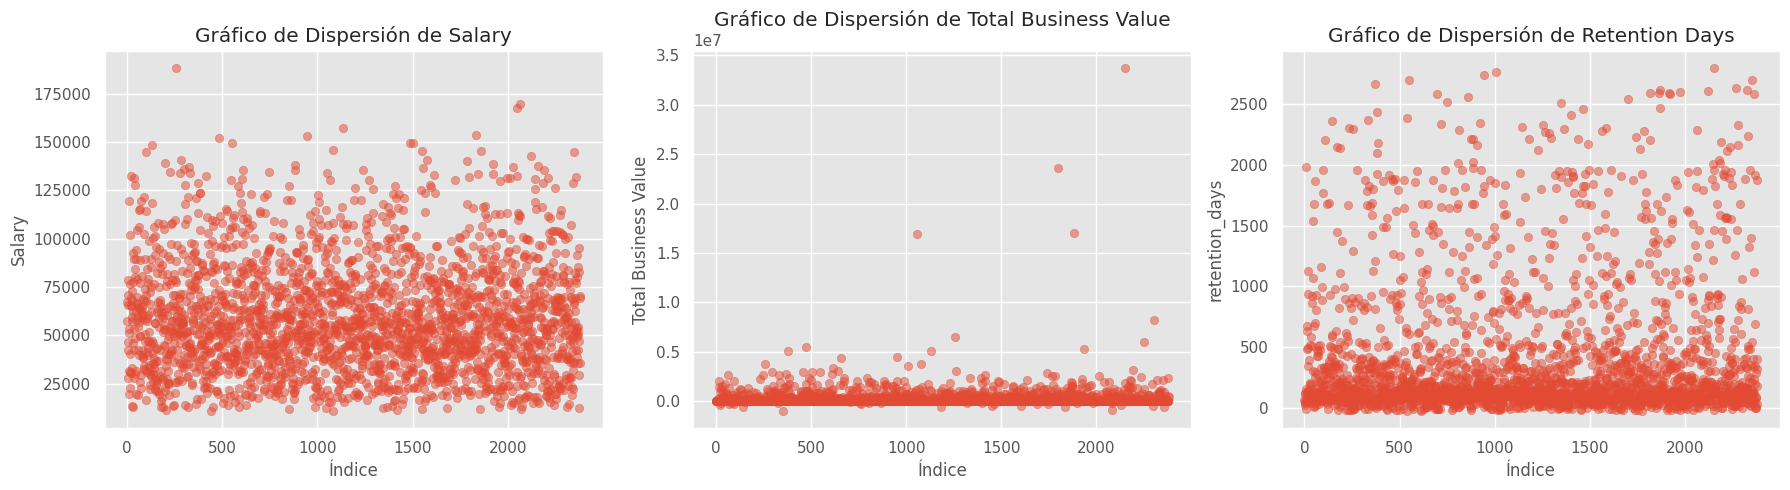

In [1364]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame 'd' con las columnas 'Salary', 'Total Business Value' y 'Retention Days'
x = range(len(d))  # Valores x para los gráficos de dispersión

# Crea una figura con tres subplots (gráficos) uno al lado del otro
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico de dispersión para 'Salary'
ax1.scatter(x, d['Salary'], alpha=0.5)
ax1.set_xlabel('Índice')
ax1.set_ylabel('Salary')
ax1.set_title('Gráfico de Dispersión de Salary')

# Gráfico de dispersión para 'Total Business Value'
ax2.scatter(x, d['Total Business Value'], alpha=0.5)
ax2.set_xlabel('Índice')
ax2.set_ylabel('Total Business Value')
ax2.set_title('Gráfico de Dispersión de Total Business Value')

# Gráfico de dispersión para 'Retention Days'
ax3.scatter(x, d['retention_days'], alpha=0.5)
ax3.set_xlabel('Índice')
ax3.set_ylabel('retention_days')
ax3.set_title('Gráfico de Dispersión de Retention Days')

# Ajusta el espaciado entre los gráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()


In [1365]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 2 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                2381 non-null   datetime64[ns]
 1   Emp_ID                2381 non-null   int64         
 2   Age                   2381 non-null   int64         
 3   Gender                2381 non-null   object        
 4   City                  2381 non-null   object        
 5   Education_Level       2381 non-null   object        
 6   Salary                2381 non-null   int64         
 7   Dateofjoining         2381 non-null   datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   2381 non-null   int64         
 10  Designation           2381 non-null   int64         
 11  Total Business Value  2381 non-null   int64         
 12  Quarterly Rating      2381 non-null   int64         
 13  attrition        

###Convertir rangos de salary

Dado que hay una fuerte dispersión en la variable Salary, explicado muy probablemente porque los empleados comisionan por ventas, se decide convertir esta variable a rangos

In [1366]:
import pandas as pd

# Supongamos que tienes un DataFrame 'df' y quieres dividir la columna 'salary' en rangos de igual tamaño.

# Define el número de bins (rangos) que deseas
#num_bins = 4  # Puedes ajustar este valor según tus necesidades

# Usa pd.cut() para dividir 'salary' en rangos de igual tamaño
#d['Salary_Range'] = pd.cut(d['Salary'], bins=num_bins)

# 'Salary_Range' ahora contendrá los rangos de salario.


In [1367]:
# Define los límites de los rangos
bins = [10000, 30000, 50000, 70000, 200000]

# Etiquetas para cada rango
labels = ['10 mil - 30mil', '30 mil - 50 mil', '50 mil- 70 mil', '+ 70 mil']

# Usa pd.cut para crear la columna 'Salary_Range'
d['Salary_Range'] = pd.cut(d['Salary'], bins=bins, labels=labels)

# Muestra el DataFrame resultante
print(d)

          MMM-YY  Emp_ID  Age  Gender City Education_Level  Salary  \
2     2016-03-01       1   28    Male  C23          Master   57387   
4     2017-12-01       2   31    Male   C7          Master   67016   
9     2017-04-01       4   43    Male  C13          Master   65603   
12    2016-03-01       5   29    Male   C9         College   46368   
17    2017-12-01       6   31  Female  C11        Bachelor   78728   
...          ...     ...  ...     ...  ...             ...     ...   
19078 2017-12-01    2784   34    Male  C24         College   82815   
19081 2017-10-01    2785   34  Female   C9         College   12105   
19090 2016-09-01    2786   45    Male  C19         College   35370   
19096 2016-06-01    2787   28  Female  C20          Master   69498   
19103 2017-12-01    2788   30    Male  C27          Master   70254   

      Dateofjoining LastWorkingDate  Joining Designation  Designation  \
2        2015-12-24      2016-03-11                    1            1   
4        2017

In [1368]:
d['Salary_Range'].value_counts()

+ 70 mil           722
50 mil- 70 mil     667
30 mil - 50 mil    642
10 mil - 30mil     350
Name: Salary_Range, dtype: int64

### Convertir rangos de retention_days

Dado que para el analisis del negocio resulta mejor medir la retención en rangos de permanencia y no en días, se crea el rango

In [1369]:
import pandas as pd

# Supongamos que tienes un DataFrame 'df' con una columna 'retention_days'

# Definir los límites de los rangos en días
limites_rangos_dias = [0, 30, 90, 180, 270, 360, 1080, float('inf')]  # En días
# Siendo float('inf') un valor infinito para representar más de 36 meses

# Función para asignar el rango en meses
def asignar_rango(retention_days):
    for i in range(len(limites_rangos_dias) - 1):
        if limites_rangos_dias[i] <= retention_days < limites_rangos_dias[i+1]:
            if i == 0:
                return "<1 mes"
            elif i == 1:
                return "1-3 meses"
            elif i == 2:
                return "3-6 meses"
            elif i == 3:
                return "6-9 meses"
            elif i == 4:
                return "9-12 meses"
            elif i == 5:
                return "12-36 meses"
            else:
                return "+36 meses"

# Crear la nueva columna 'Retention_Rango' basada en 'retention_days'
d['Retention_Rango'] = d['retention_days'].apply(asignar_rango)

# Imprimir el DataFrame con la nueva columna
d


,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days,promoted,Salary_Range,Retention_Rango
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,68.0000,0,50 mil- 70 mil,1-3 meses
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,25.0000,0,50 mil- 70 mil,<1 mes
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1,115.0000,0,50 mil- 70 mil,3-6 meses
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1,52.0000,0,30 mil - 50 mil,1-3 meses
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2,0,123.0000,0,+ 70 mil,3-6 meses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaT,2,3,505480,4,0,1873.0000,1,+ 70 mil,+36 meses
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1,1,34.0000,0,10 mil - 30mil,1-3 meses
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1,1,398.0000,0,30 mil - 50 mil,12-36 meses
19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1,1,316.0000,0,50 mil- 70 mil,9-12 meses


In [1370]:
d['Retention_Rango'].value_counts()

3-6 meses      574
1-3 meses      442
12-36 meses    441
+36 meses      286
6-9 meses      271
9-12 meses     167
<1 mes         128
Name: Retention_Rango, dtype: int64

In [1371]:
d

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,attrition,retention_days,promoted,Salary_Range,Retention_Rango
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,68.0000,0,50 mil- 70 mil,1-3 meses
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,25.0000,0,50 mil- 70 mil,<1 mes
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1,115.0000,0,50 mil- 70 mil,3-6 meses
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1,52.0000,0,30 mil - 50 mil,1-3 meses
17,2017-12-01,6,31,Female,C11,Bachelor,78728,2017-07-31,NaT,3,3,0,2,0,123.0000,0,+ 70 mil,3-6 meses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,2017-12-01,2784,34,Male,C24,College,82815,2012-10-15,NaT,2,3,505480,4,0,1873.0000,1,+ 70 mil,+36 meses
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1,1,34.0000,0,10 mil - 30mil,1-3 meses
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1,1,398.0000,0,30 mil - 50 mil,12-36 meses
19096,2016-06-01,2787,28,Female,C20,Master,69498,2015-07-21,2016-06-20,1,1,0,1,1,316.0000,0,50 mil- 70 mil,9-12 meses


### Graficos de distribución de las variables

In [1372]:
columnas_final= d[['Age', 'Gender', 'Education_Level',
       'Joining Designation', 'Designation',
       'Quarterly Rating','City', 'promoted','Retention_Rango','Salary_Range']]

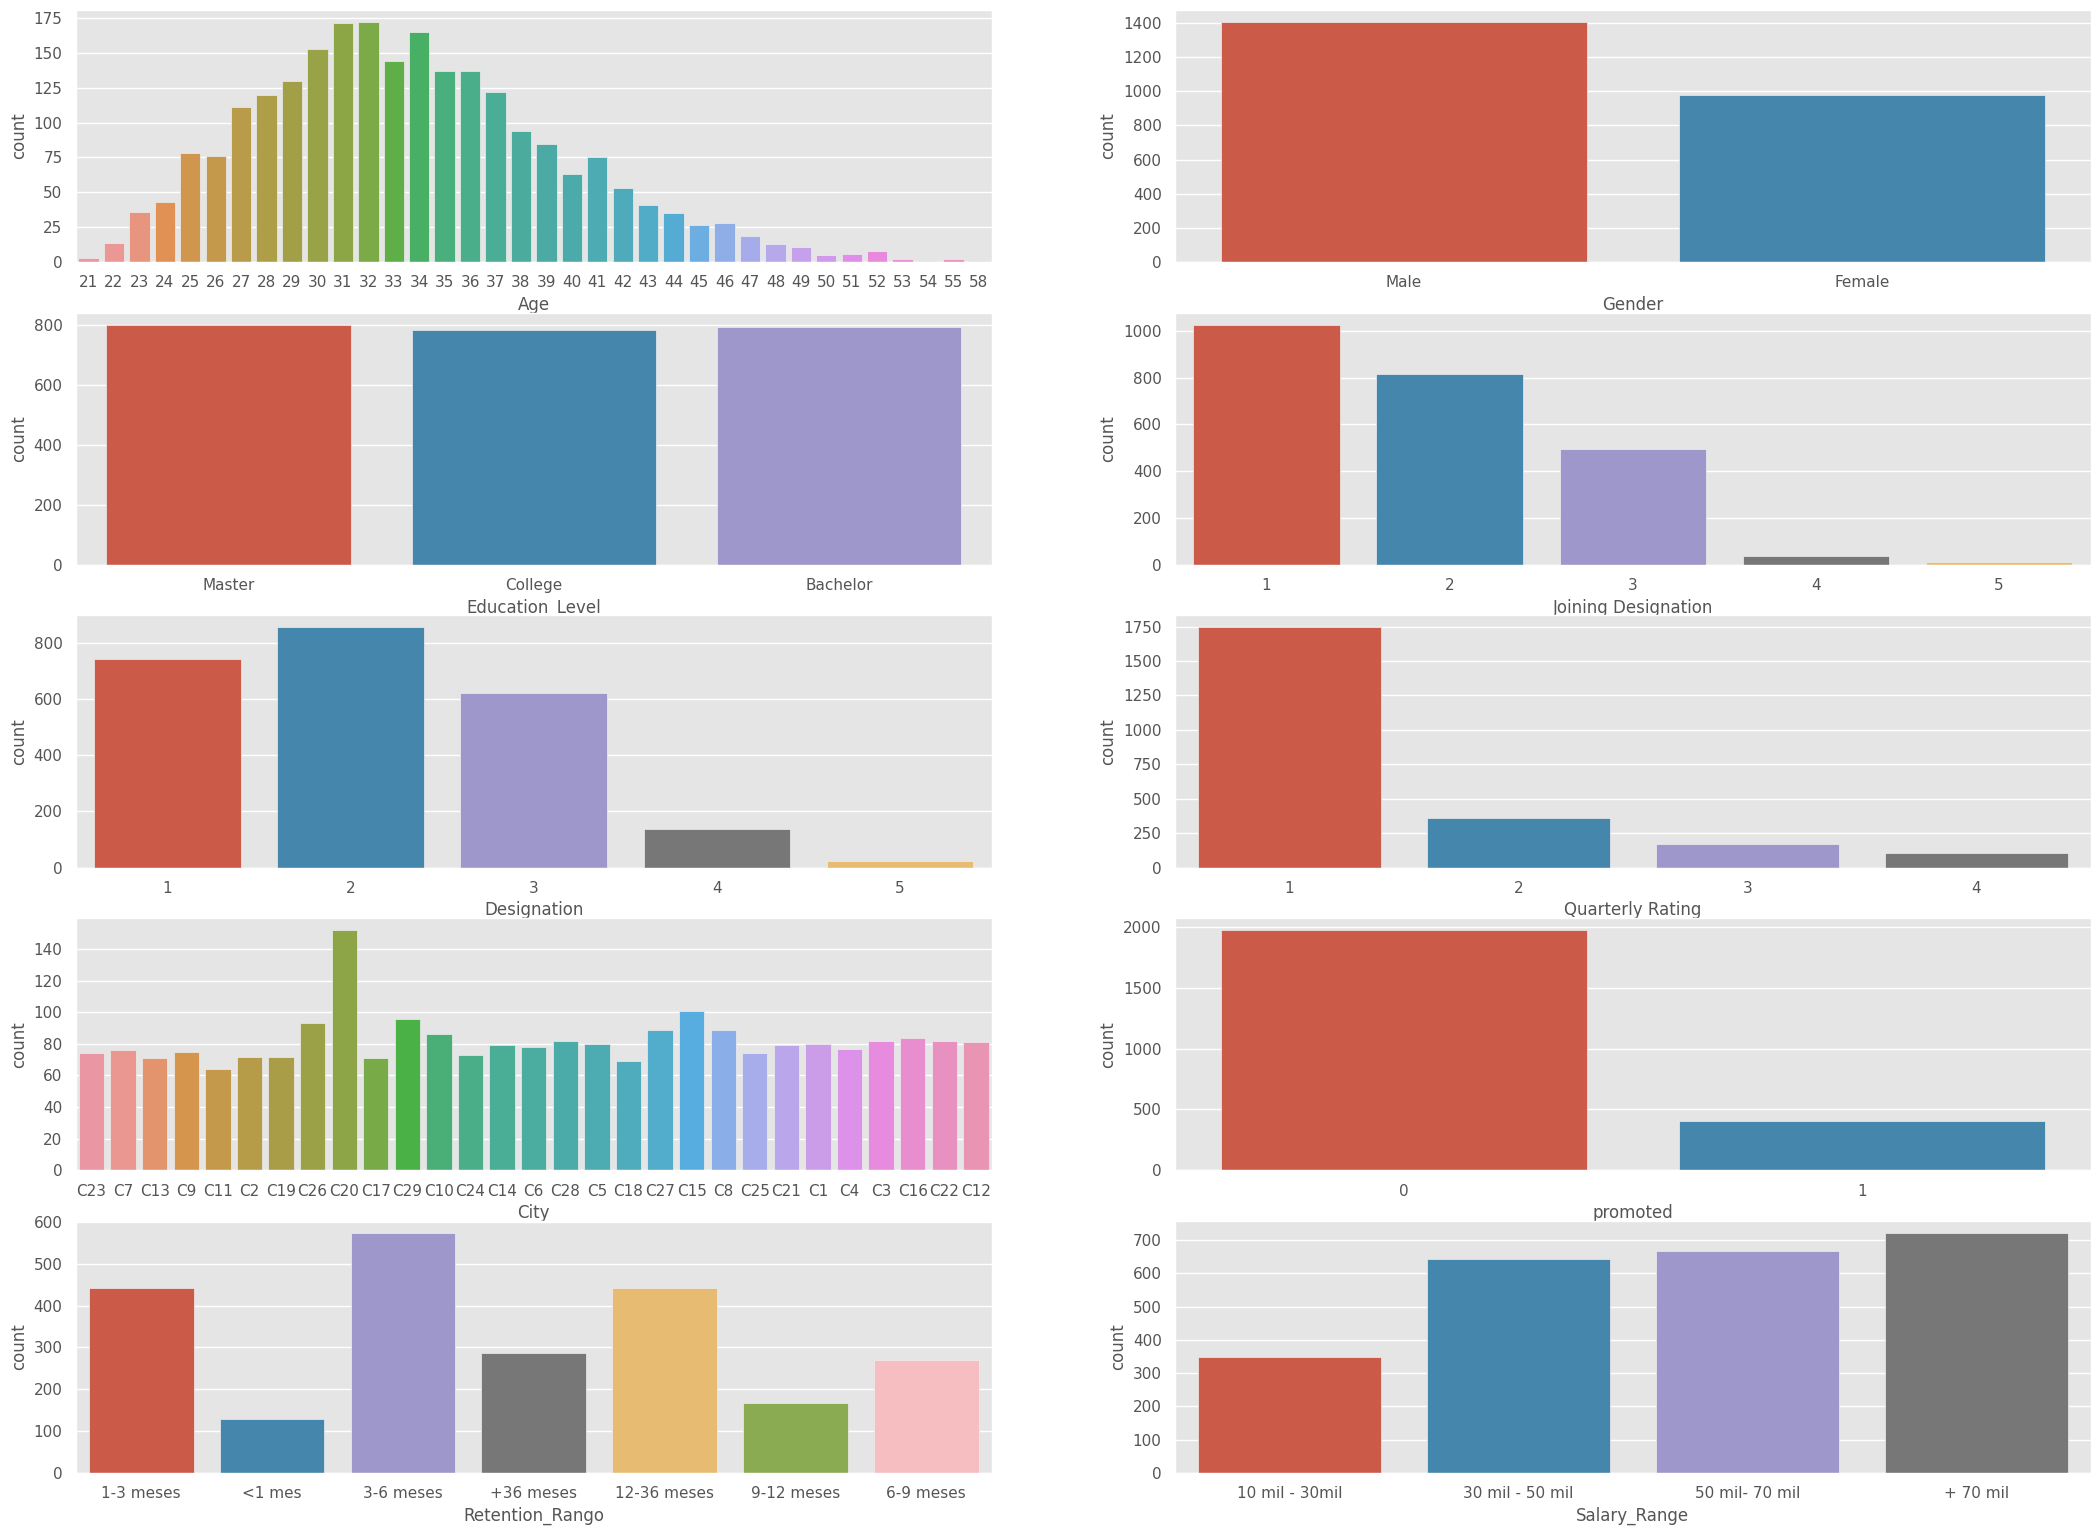

In [1373]:
plot_multiples_graficas(d,columnas_final, 2, 5, 'c', None, (26,19))

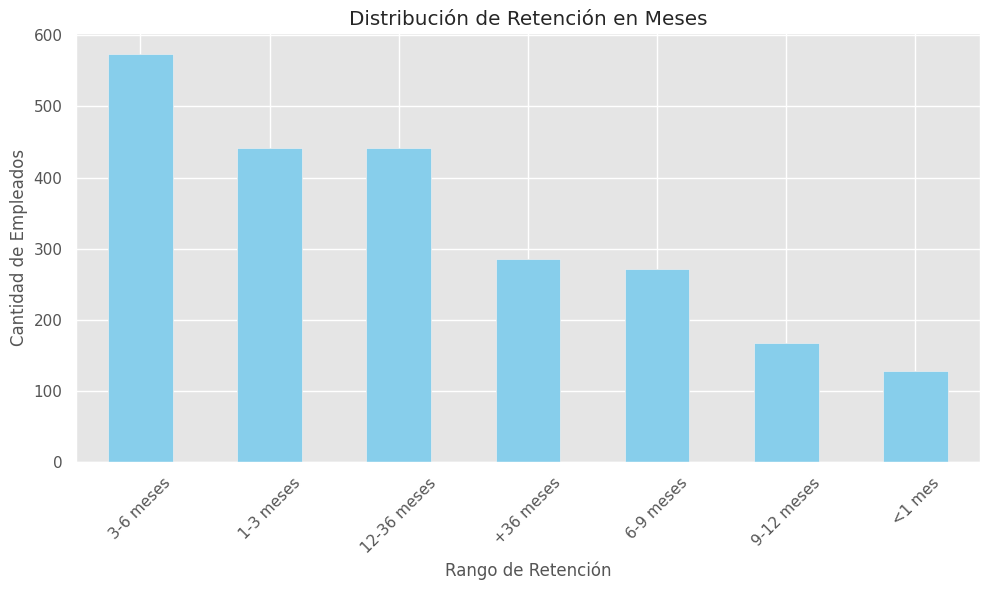

In [1374]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame 'df' con la columna 'Retention_Rango'

# Calcular el conteo de cada categoría en 'Retention_Rango'
conteo_retencion = d['Retention_Rango'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
conteo_retencion.plot(kind='bar', color='skyblue')
plt.title('Distribución de Retención en Meses')
plt.xlabel('Rango de Retención')
plt.ylabel('Cantidad de Empleados')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()


**Acá se puede observar un desbalance en las clases de la variable de salida**

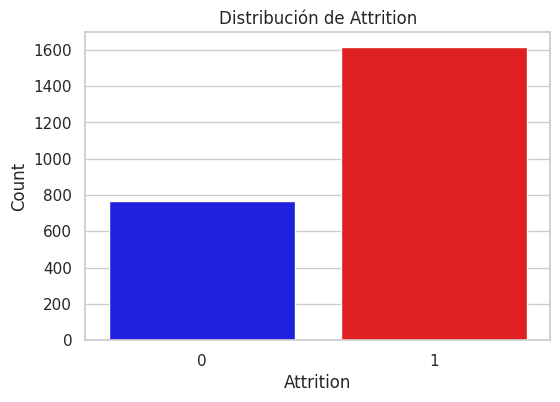

In [1375]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu dataset "d" tiene una columna llamada "attrition" con valores 0 y 1

# Gráfico de barras
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=d, x="attrition", palette=["blue", "red"])
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Distribución de Attrition")
plt.show()


### **Obtener** dummies

In [1376]:
d.drop([ 'MMM-YY','Emp_ID','City','Dateofjoining','LastWorkingDate',"Salary", "Total Business Value","retention_days","Joining Designation","Designation"], axis='columns', inplace=True)

In [1377]:
d

,Age,Gender,Education_Level,Quarterly Rating,attrition,promoted,Salary_Range,Retention_Rango
2,28,Male,Master,2,1,0,50 mil- 70 mil,1-3 meses
4,31,Male,Master,1,0,0,50 mil- 70 mil,<1 mes
9,43,Male,Master,1,1,0,50 mil- 70 mil,3-6 meses
12,29,Male,College,1,1,0,30 mil - 50 mil,1-3 meses
17,31,Female,Bachelor,2,0,0,+ 70 mil,3-6 meses
...,...,...,...,...,...,...,...,...
19078,34,Male,College,4,0,1,+ 70 mil,+36 meses
19081,34,Female,College,1,1,0,10 mil - 30mil,1-3 meses
19090,45,Male,College,1,1,0,30 mil - 50 mil,12-36 meses
19096,28,Female,Master,1,1,0,50 mil- 70 mil,9-12 meses


In [1378]:
d['GenderBin'] = d['Gender'].map({'Male': 0, 'Female': 1})

In [1379]:
d['GenderBin'].value_counts()

0    1404
1     977
Name: GenderBin, dtype: int64

In [1380]:
d.drop([ "Gender"], axis='columns', inplace=True)

In [1381]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 2 to 19103
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               2381 non-null   int64   
 1   Education_Level   2381 non-null   object  
 2   Quarterly Rating  2381 non-null   int64   
 3   attrition         2381 non-null   int64   
 4   promoted          2381 non-null   int64   
 5   Salary_Range      2381 non-null   category
 6   Retention_Rango   2309 non-null   object  
 7   GenderBin         2381 non-null   int64   
dtypes: category(1), int64(5), object(2)
memory usage: 151.3+ KB


In [1382]:
d_cat =pd.get_dummies(d, drop_first=0)

In [1383]:
d_cat

,Age,Quarterly Rating,attrition,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes
2,28,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
4,31,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
9,43,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
12,29,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
17,31,2,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,34,4,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
19081,34,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0
19090,45,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
19096,28,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0


###Balanceo

Dado el desbalance en las clases de la variable de salida, se procede a realizar balanceo con tecnica de oversampler para aumentar muestras

In [1384]:
# Se crea un objeto RandomOverSampler que permite crear copias aleatorias de las muestras de la clase
# minoritaria para igualar el número de muestras entre las diferentes clases.
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(d_cat.drop('attrition', axis=1), d_cat['attrition'])

# Se crean dos dataframes con las variables de entrada y otro con la variable de salida a partir del proceso anterior
df1 = pd.DataFrame(X_resampled, columns=d_cat.columns.drop('attrition'))
df2 = pd.DataFrame(y_resampled)

# Se concatenan los dataframes horizontalmente
df_balanced = pd.concat([df1, df2], axis=1)

In [1385]:
# Dataset balanceado
df_balanced.head()

,Age,Quarterly Rating,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes,attrition
0,28,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,31,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,43,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,31,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [1386]:
df_balanced['attrition'].value_counts()

1    1616
0    1616
Name: attrition, dtype: int64

###Exportar dataset listo

Acá se exportó el dataset balanceado a una carpeta personal de drive

In [1387]:
#Cargar el dataset
df=pd.read_csv('https://raw.githubusercontent.com/shirleyjimenezo/ShirleyMonografiaUdeA/main/data_final_balanceada.csv')

El dataset final queda con 3.232 filas y 19 columnas que incluye las que fueron dummizadas

In [1388]:
df

,Age,Quarterly Rating,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes,attrition
0,28,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,31,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,43,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,31,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,35,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3228,24,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3229,44,3,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3230,24,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           3232 non-null   int64
 1   Quarterly Rating              3232 non-null   int64
 2   promoted                      3232 non-null   int64
 3   GenderBin                     3232 non-null   int64
 4   Education_Level_Bachelor      3232 non-null   int64
 5   Education_Level_College       3232 non-null   int64
 6   Education_Level_Master        3232 non-null   int64
 7   Salary_Range_10 mil - 30mil   3232 non-null   int64
 8   Salary_Range_30 mil - 50 mil  3232 non-null   int64
 9   Salary_Range_50 mil- 70 mil   3232 non-null   int64
 10  Salary_Range_+ 70 mil         3232 non-null   int64
 11  Retention_Rango_+36 meses     3232 non-null   int64
 12  Retention_Rango_1-3 meses     3232 non-null   int64
 13  Retention_Rango_12-36 meses   323

In [1390]:
nombres_columnas = df.columns.tolist()

In [1391]:
nombres_columnas

['Age',
 'Quarterly Rating',
 'promoted',
 'GenderBin',
 'Education_Level_Bachelor',
 'Education_Level_College',
 'Education_Level_Master',
 'Salary_Range_10 mil - 30mil',
 'Salary_Range_30 mil - 50 mil',
 'Salary_Range_50 mil- 70 mil',
 'Salary_Range_+ 70 mil',
 'Retention_Rango_+36 meses',
 'Retention_Rango_1-3 meses',
 'Retention_Rango_12-36 meses',
 'Retention_Rango_3-6 meses',
 'Retention_Rango_6-9 meses',
 'Retention_Rango_9-12 meses',
 'Retention_Rango_<1 mes',
 'attrition']

###Análisis bivarible

Se realiza análisis para ver distribución de las categorías de variables independientes según la variable de salida

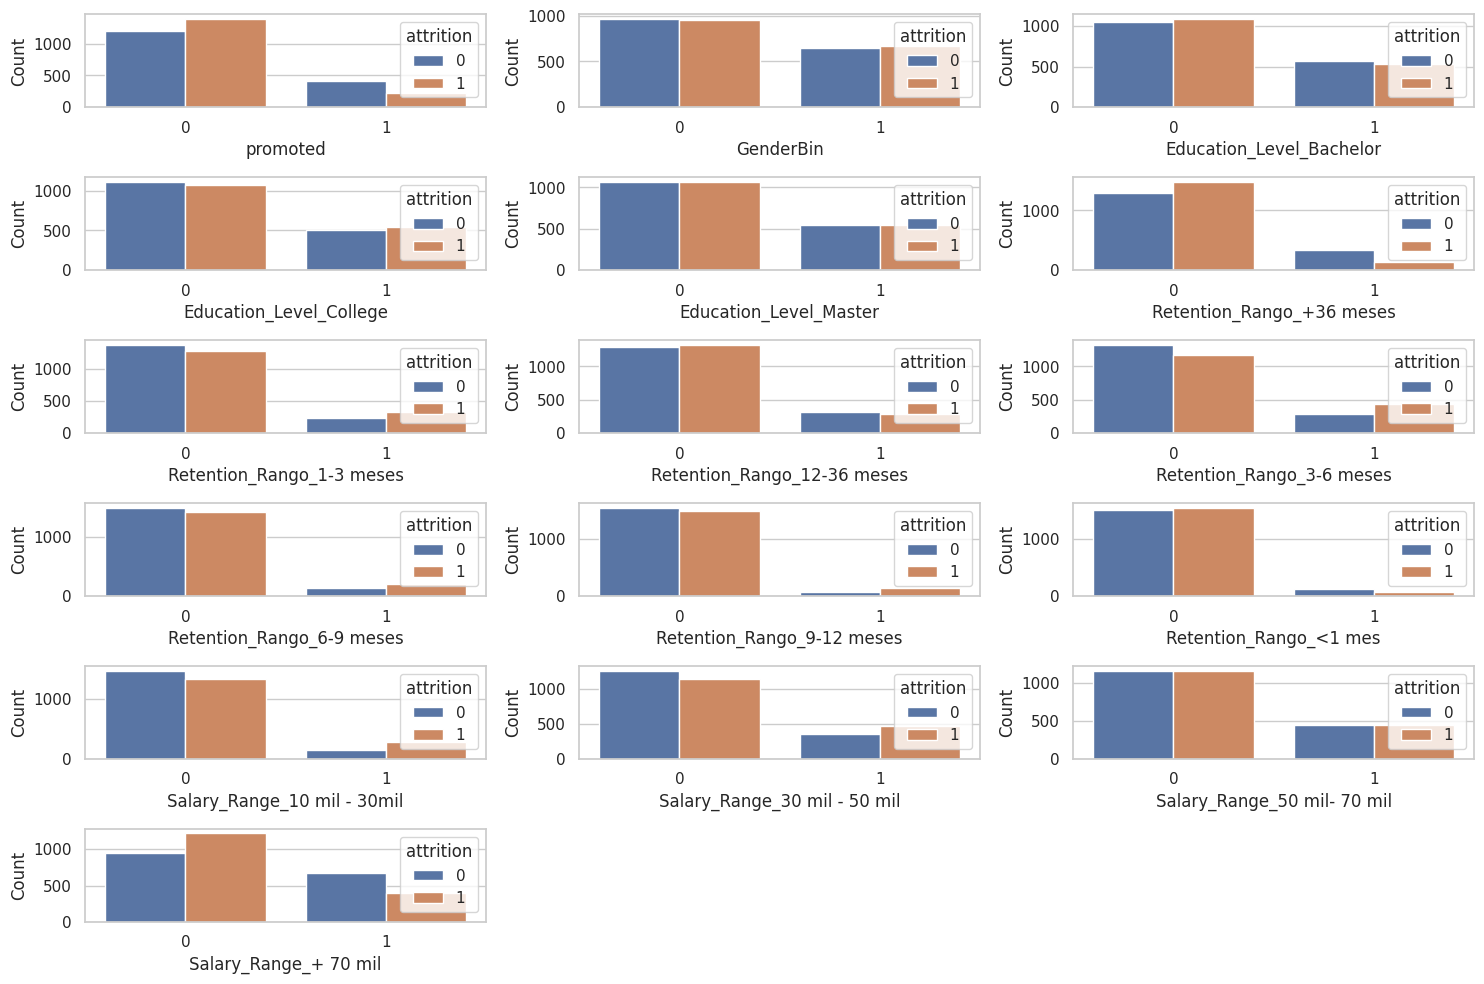

In [1392]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de las 12 variables dicotómicas
variables_dicotomicas = ['promoted','GenderBin','Education_Level_Bachelor','Education_Level_College','Education_Level_Master','Retention_Rango_+36 meses','Retention_Rango_1-3 meses',
 'Retention_Rango_12-36 meses',
 'Retention_Rango_3-6 meses',
 'Retention_Rango_6-9 meses',
 'Retention_Rango_9-12 meses',
 'Retention_Rango_<1 mes',
 'Salary_Range_10 mil - 30mil',
 'Salary_Range_30 mil - 50 mil',
 'Salary_Range_50 mil- 70 mil',
 'Salary_Range_+ 70 mil']

# Establecer un tamaño para la figura
plt.figure(figsize=(15, 10))

# Iterar a través de las variables y crear los gráficos de barras apilados
for i, variable in enumerate(variables_dicotomicas, 1):
    plt.subplot(6, 3, i)  # Crear una cuadrícula de 3x4 para los gráficos
    sns.countplot(data=df, x=variable, hue='attrition')
    plt.xlabel(variable)
    plt.ylabel('Count')

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [1393]:
Datos_Categoricos = df[['promoted','GenderBin','Education_Level_Bachelor','Education_Level_College','Education_Level_Master','Retention_Rango_+36 meses','Retention_Rango_1-3 meses',
 'Retention_Rango_12-36 meses',
 'Retention_Rango_3-6 meses',
 'Retention_Rango_6-9 meses',
 'Retention_Rango_9-12 meses',
 'Retention_Rango_<1 mes','Salary_Range_10 mil - 30mil',
 'Salary_Range_30 mil - 50 mil',
 'Salary_Range_50 mil- 70 mil',
 'Salary_Range_+ 70 mil']]
Datos_Categoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   promoted                      3232 non-null   int64
 1   GenderBin                     3232 non-null   int64
 2   Education_Level_Bachelor      3232 non-null   int64
 3   Education_Level_College       3232 non-null   int64
 4   Education_Level_Master        3232 non-null   int64
 5   Retention_Rango_+36 meses     3232 non-null   int64
 6   Retention_Rango_1-3 meses     3232 non-null   int64
 7   Retention_Rango_12-36 meses   3232 non-null   int64
 8   Retention_Rango_3-6 meses     3232 non-null   int64
 9   Retention_Rango_6-9 meses     3232 non-null   int64
 10  Retention_Rango_9-12 meses    3232 non-null   int64
 11  Retention_Rango_<1 mes        3232 non-null   int64
 12  Salary_Range_10 mil - 30mil   3232 non-null   int64
 13  Salary_Range_30 mil - 50 mil  323

###Matriz de Información Mutua

Esta matriz permite observar si hay relación muy fuerte o mutua entre las variables independientes, de esta forma decidir si hay que eliminar alguna de ellas


In [1394]:
import pandas as pd
import io
import requests
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches

import scipy.stats
from pandas import crosstab # Generador de tablas de contingencia
from scipy.stats import fisher_exact # Test exacto de Fisher
from scipy.stats import chisquare # Test Chi-Cuadrada
from sklearn.metrics import mutual_info_score # Información Mutua

In [1395]:
datos_array = Datos_Categoricos.values
features = np.arange(0,datos_array.shape[1])
MI = []

for d in features:
  for e in features:
    Tabla_Contingencia = crosstab(datos_array[:,d], datos_array[:,e])
    mi = mutual_info_score(labels_true=None, labels_pred=None, contingency = Tabla_Contingencia)
    MI.append(mi)

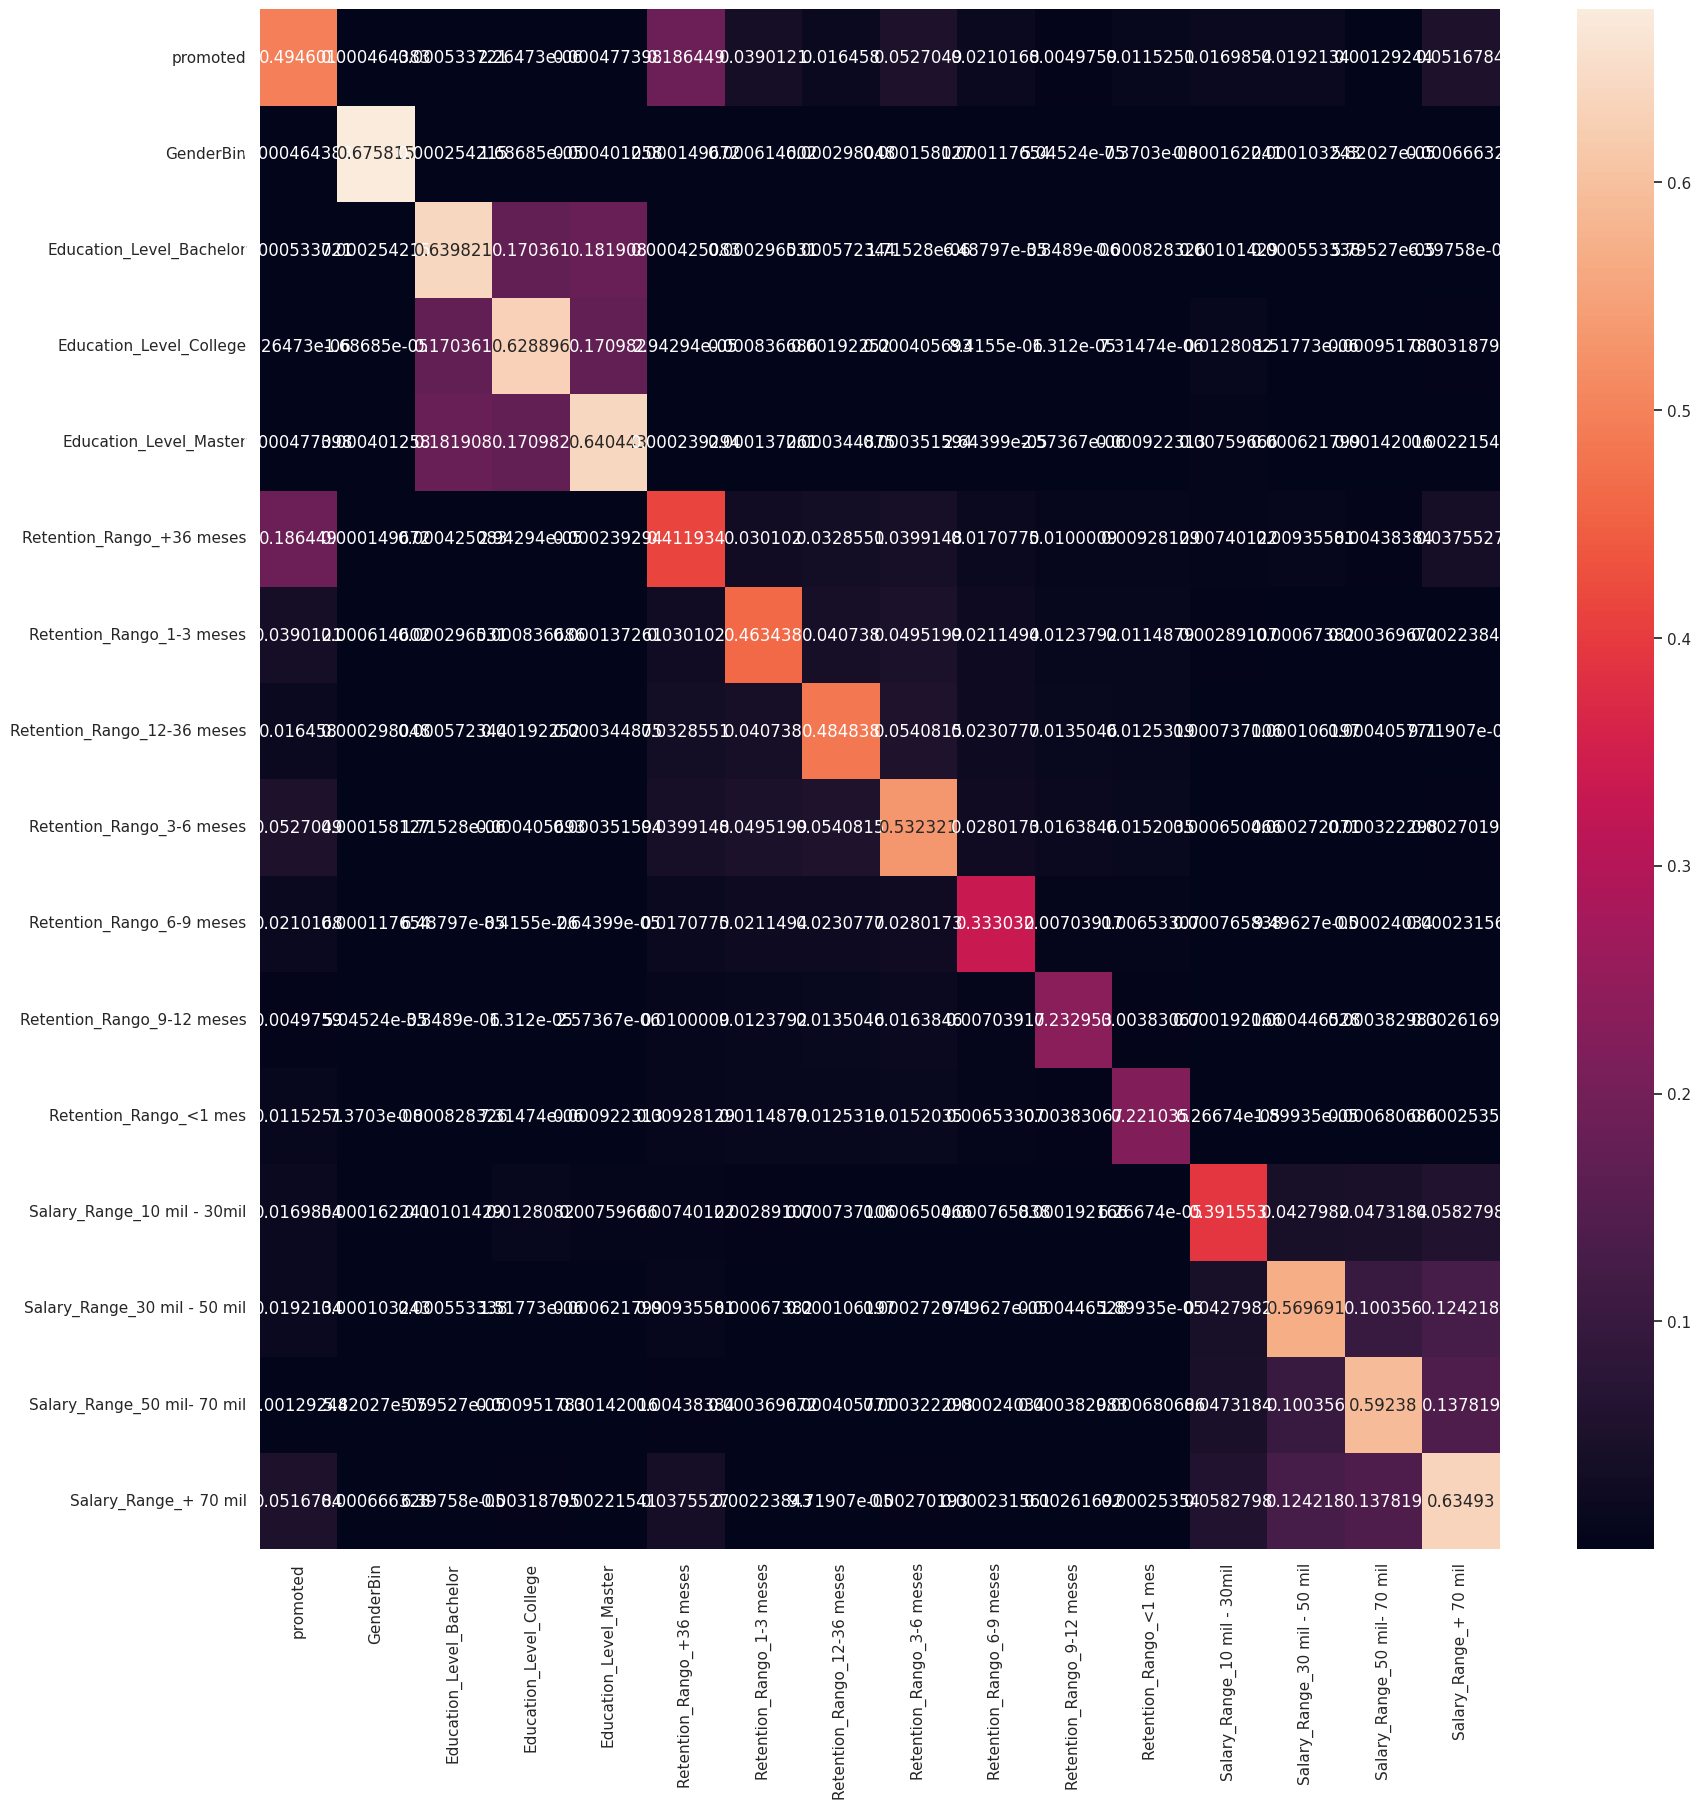

In [1396]:
MI = np.asarray(MI)
MI = MI.reshape(datos_array.shape[1], datos_array.shape[1])

plt.figure(figsize=(20,20))
ax = sns.heatmap(MI, annot=True, fmt='g', xticklabels = Datos_Categoricos.columns , yticklabels = Datos_Categoricos.columns)
plt.show()

Las relaciones son muy debiles, se procede a dejar todas en el modelo

## Segunda parte, carga de base final

In [1397]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
import math

#Separar los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split


#Escalar Variables
from sklearn.preprocessing import MinMaxScaler


#Evaluación del modelo
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


#Creación de modelos
from sklearn import svm
from sklearn import neighbors
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression


#creación de modelos arboles
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

#evaluacion de variables
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [1398]:
# Función para graficar un plot con multiples gráficas del mismo tipo:
#
# df       : dataframe
# cols     : lista de columnas a graficar
# num_cols : número de columnas
# num_rows : número de filas
# tipo     : 'c' = countplot,   'b' = boxplot, 's' = scatterplot
# targetVar: nombre de la variable comparativa de salida. Debe ser numérica y debe estar cotenida en el dataframe.
#            Para countplot no es necesario (None)
# figsize  : tamaño del plot. Valor por defecto (16,8)
#
# *Nota: el número de filas * el número de columnas debe ser mayor al total de elementos de cols
#
# Ejemplos:
#    plot_multiples_graficas (d, catCols, 5, 3, 'c', None, (16,12))
#    plot_multiples_graficas (d, numCols, 5, 3, 's', 'price', (16,12))
#    plot_multiples_graficas (d, ['make'], 1, 1, 'b', 'price', (16,12))
# ==============================================================================


def plot_multiples_graficas(df, cols, num_cols, num_rows, tipo, targetVar, figsize=(16,8)):

    plt.rcParams['figure.figsize'] = figsize

    #num_plots = len(cols)
    #num_cols = math.ceil(np.sqrt(num_plots))
    #num_rows = math.ceil(num_plots/num_cols)

    fig, axs = plt.subplots(num_rows, num_cols)

    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols

        if num_rows == 1:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs, dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs)
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs)
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[j])
        else:
            if num_cols == 1:
                if tipo == 'c':
                    sns.countplot(x=d[col], ax=axs[i], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i])
            else:
                if tipo == 'c':
                    sns.countplot(x=df[col], ax=axs[i, j], dodge = False)
                if tipo == 'b':
                    sns.boxplot(x=df[col], y=df[targetVar], ax=axs[i, j])
                if tipo == 's':
                    sns.scatterplot(x=df[col], y=df[targetVar], ax=axs[i, j])

### Importar base de datos

Se importa base de datos final balanceada

In [1399]:
d=pd.read_csv('https://raw.githubusercontent.com/shirleyjimenezo/ShirleyMonografiaUdeA/main/data_final_balanceada.csv')

In [1400]:
d

,Age,Quarterly Rating,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes,attrition
0,28,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,31,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,43,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,31,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,35,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3228,24,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3229,44,3,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3230,24,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1401]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Age                           3232 non-null   int64
 1   Quarterly Rating              3232 non-null   int64
 2   promoted                      3232 non-null   int64
 3   GenderBin                     3232 non-null   int64
 4   Education_Level_Bachelor      3232 non-null   int64
 5   Education_Level_College       3232 non-null   int64
 6   Education_Level_Master        3232 non-null   int64
 7   Salary_Range_10 mil - 30mil   3232 non-null   int64
 8   Salary_Range_30 mil - 50 mil  3232 non-null   int64
 9   Salary_Range_50 mil- 70 mil   3232 non-null   int64
 10  Salary_Range_+ 70 mil         3232 non-null   int64
 11  Retention_Rango_+36 meses     3232 non-null   int64
 12  Retention_Rango_1-3 meses     3232 non-null   int64
 13  Retention_Rango_12-36 meses   323

In [1402]:
d.columns.values

array(['Age', 'Quarterly Rating', 'promoted', 'GenderBin',
       'Education_Level_Bachelor', 'Education_Level_College',
       'Education_Level_Master', 'Salary_Range_10 mil - 30mil',
       'Salary_Range_30 mil - 50 mil', 'Salary_Range_50 mil- 70 mil',
       'Salary_Range_+ 70 mil', 'Retention_Rango_+36 meses',
       'Retention_Rango_1-3 meses', 'Retention_Rango_12-36 meses',
       'Retention_Rango_3-6 meses', 'Retention_Rango_6-9 meses',
       'Retention_Rango_9-12 meses', 'Retention_Rango_<1 mes',
       'attrition'], dtype=object)

In [1403]:
d['attrition'].value_counts()

1    1616
0    1616
Name: attrition, dtype: int64

### Dividir el conjunto de datos

Se dividen los datos en 80% entrenamiento, 20% de prueba.

In [1404]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d.drop(columns ='attrition')
y = d['attrition']

In [1405]:
# Se crean los datasets de entrenamiento y prueba para las variables de entrada y salida

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

### Escalar Variables

Se escalan variables númericas

In [1406]:
numCols=X.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

d[numCols].head()

,Age,Quarterly Rating,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes
0,28,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,31,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2,43,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
3,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
4,31,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [1407]:
num_vars=numCols

In [1408]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_train[num_vars].head()

,Age,Quarterly Rating,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes
1286,0.2973,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
1204,0.2973,0.3333,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1183,0.2432,0.3333,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
655,0.4865,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
1361,0.4324,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000


### 1era iteración, modelo árbol de decisión con parametros a criterio propio

##### Arboles de decisión

Se decide elegir arbitrariamente como parametros del arbol de decisión una profundidad de 5, criterion gini, random_state=123

In [1409]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

Profundidad del árbol: 5
Número de nodos terminales: 27


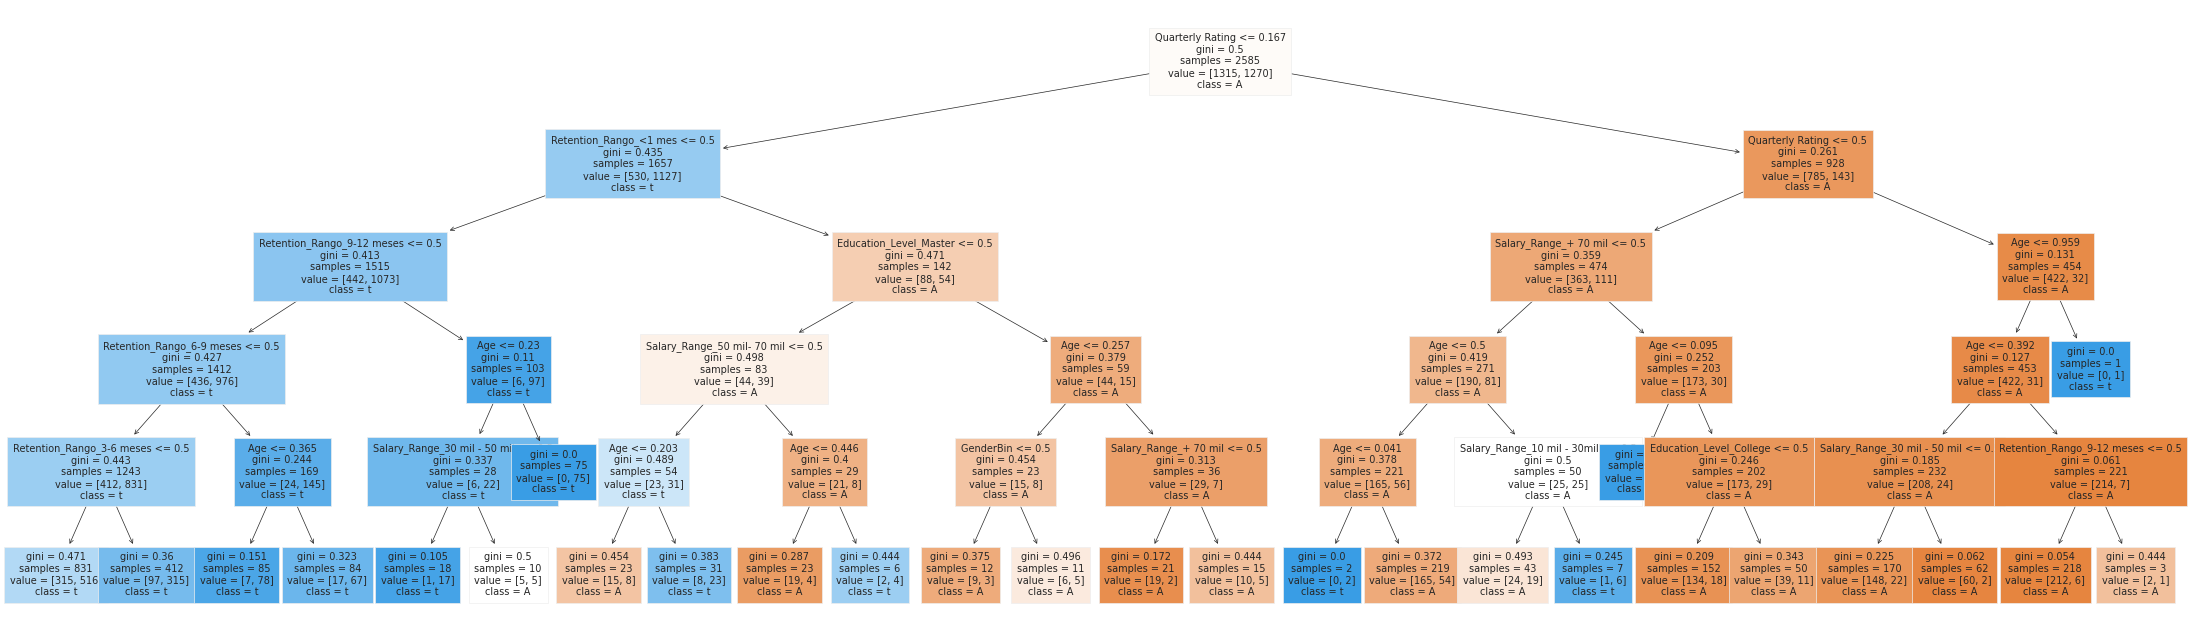

In [1410]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(28, 8))


print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = X.columns,
            class_names   = 'Attrition',
            filled        = True,
            impurity      = True,
            fontsize      = 7,
            ax            = ax
       )

In [1411]:
y_pred = modelo.predict(X_test)

**Figura 13 Matriz confusión primera iteración del modelo de árbol de decisión con parámetros a criterio propio**

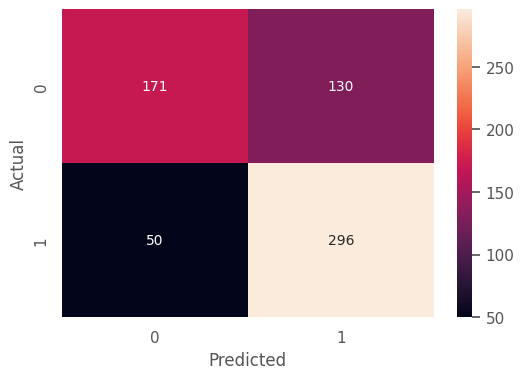

              precision    recall  f1-score   support

           0       0.77      0.57      0.66       301
           1       0.69      0.86      0.77       346

    accuracy                           0.72       647
   macro avg       0.73      0.71      0.71       647
weighted avg       0.73      0.72      0.71       647



In [1412]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

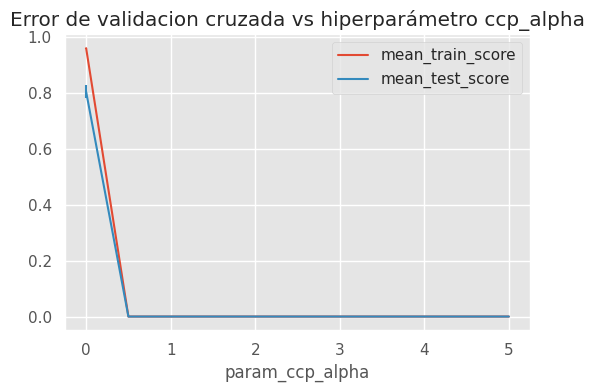

In [1413]:
# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 11)}


# Definimos las metricas sobre las que queremos evaluar
metricas = 'f1'

# definicion de la variable con el número de pliegues
CV = 10

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = metricas,
        cv         = CV,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
#
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

**Arbol de decisión usando los mejores parametros dados por la función de la libreria**

In [1414]:
# Mejor valor ccp_alpha encontrado
# ------------------------------------------------------------------------------
grid.best_params_

{'ccp_alpha': 0.0}

In [1415]:
# Estructura del árbol final
# ------------------------------------------------------------------------------
modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

Profundidad del árbol: 21
Número de nodos terminales: 573


In [1416]:
grid.best_params_

{'ccp_alpha': 0.0}

In [1417]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo2 = DecisionTreeClassifier(
            max_depth         = modelo_final.get_depth(),
            ccp_alpha         = grid.best_params_["ccp_alpha"],
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=21, random_state=123)

In [1418]:
y_pred = modelo2.predict(X_test)

**Arbol de decisión usando los mejores parametros dados por la función de la libreria MATRIZ DE CONFUSIÓN**

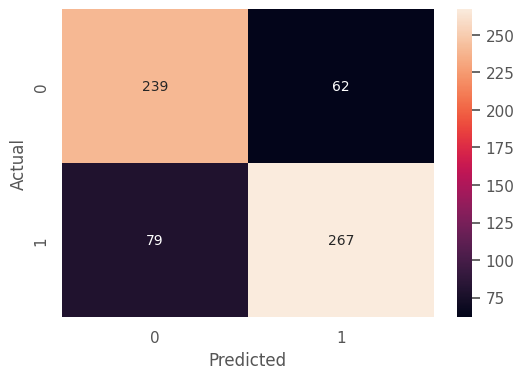

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       301
           1       0.81      0.77      0.79       346

    accuracy                           0.78       647
   macro avg       0.78      0.78      0.78       647
weighted avg       0.78      0.78      0.78       647



In [1419]:
# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

### 2da iteración, modelo árbol de decisión con mejores parametros definidos por función de la libreria

#### Creación y entrenamiento de los 3 modelos, usando los mejores parametros

In [1420]:
#Creación y entrenamiento de los modelos

modelSVC       = svm.SVC(kernel='linear', probability = True).fit(X_train, y_train)
modelLR        = LogisticRegression(random_state=0).fit(X_train, y_train)
modelTreeClas  = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)


#### Evaluación del modelo

In [1421]:
y_SVC      = modelSVC.predict(X_test)
y_LR       = modelLR.predict(X_test)
y_TreeClas = modelTreeClas.predict(X_test)


#### Exactitud (Accuracy)

In [1422]:
print("="*5 + f" Accuracy de los modelos " + "="*20)
print()
print("modelSVC      :",metrics.accuracy_score(y_test, y_SVC      ))
print("modelLR       :",metrics.accuracy_score(y_test, y_LR       ))
print("modelTreeClas :",metrics.accuracy_score(y_test, y_TreeClas ))


===== Accuracy de los modelos ====================

modelSVC      : 0.7480680061823802
modelLR       : 0.7511591962905718
modelTreeClas : 0.7836166924265843


#### Matriz de confusión para los modelos

**Figura 16 Matriz de confusión de árbol de decisión con elección de mejores parámetros**

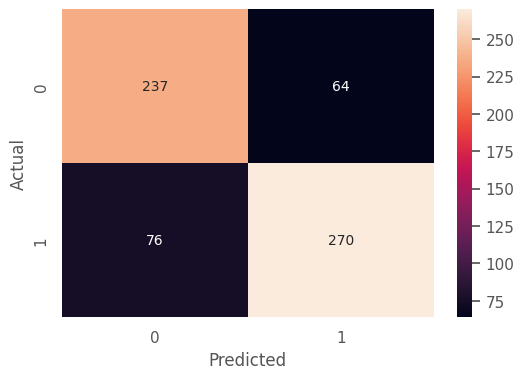

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       301
           1       0.81      0.78      0.79       346

    accuracy                           0.78       647
   macro avg       0.78      0.78      0.78       647
weighted avg       0.78      0.78      0.78       647



In [1423]:
#matriz para arbol de decisión
y_pred = y_TreeClas

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

**Figura 17 Matriz de confusión de Máquina de Vectores de Soporte SVC con elección de mejores parámetros**

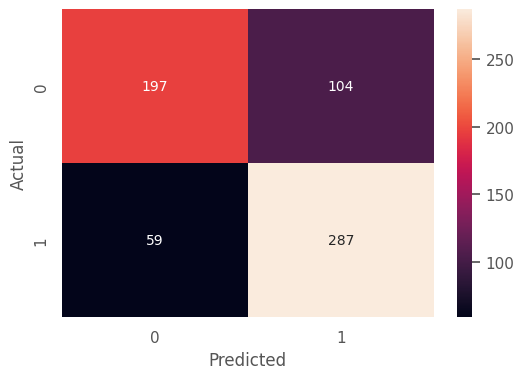

              precision    recall  f1-score   support

           0       0.77      0.65      0.71       301
           1       0.73      0.83      0.78       346

    accuracy                           0.75       647
   macro avg       0.75      0.74      0.74       647
weighted avg       0.75      0.75      0.75       647



In [1424]:
#matriz para maquina de vectores de soporte SVC
y_pred = y_SVC

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

**Figura 18 Matriz de confusión de Regresión Logística con elección de mejores parámetros**

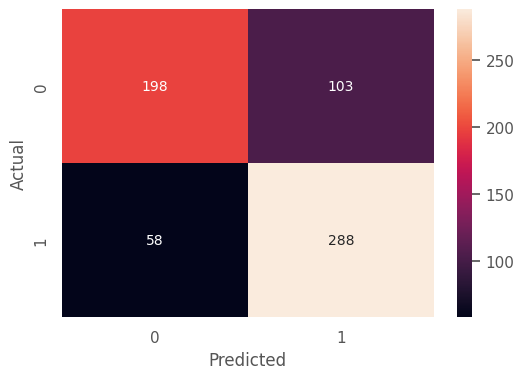

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       301
           1       0.74      0.83      0.78       346

    accuracy                           0.75       647
   macro avg       0.76      0.75      0.75       647
weighted avg       0.75      0.75      0.75       647



In [1425]:
#matriz para arbol de Regresión lineal
y_pred = y_LR

# Crear matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(conf_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_test, y_pred))

####Curva ROC

0.79: SVC(kernel='linear', probability=True)
0.82: LogisticRegression(random_state=0)
0.80: DecisionTreeClassifier(random_state=0)


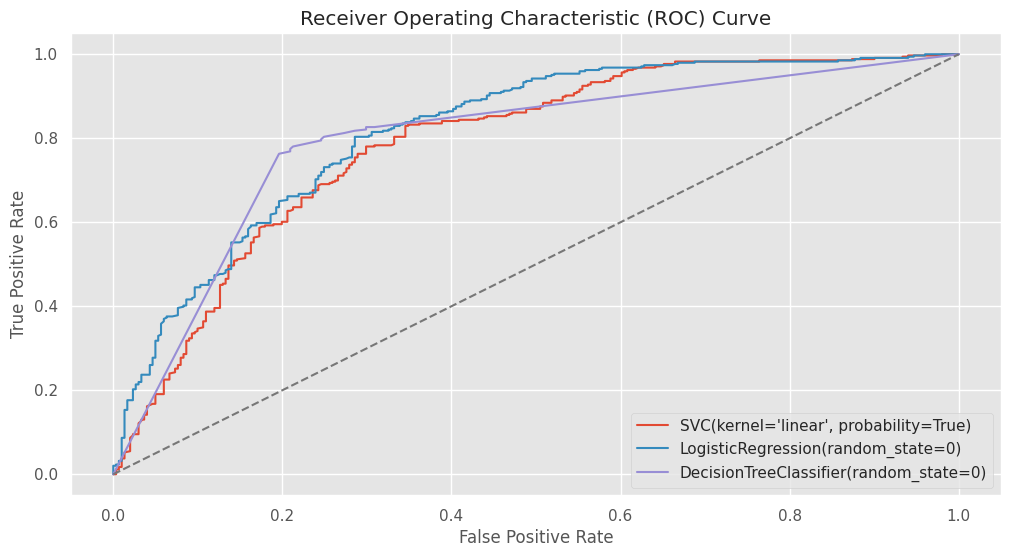

In [1426]:
# Crear figura de tamaño 10x6
fig = plt.figure(figsize=(12, 6))

# Lista de modelos a evaluar
Modelos = [modelSVC, modelLR, modelTreeClas]

# Iterar sobre los modelos
for i in range(len(Modelos)):

    # Obtener probabilidades de predicción del modelo
    probs = Modelos[i].predict_proba(X_test)

    # Seleccionar la columna correspondiente a la probabilidad de clase positiva
    probs = probs[:, 1]

    # Calcular el AUC-ROC
    auc = roc_auc_score(y_test, probs*(1))

    # Calcular las tasas de FPR y TPR
    fpr, tpr, _ = roc_curve(y_test, probs*(1))

    # Graficar la curva ROC del modelo actual
    plt.plot(fpr, tpr, label=Modelos[i])

    # Mostrar el AUC-ROC y el nombre del modelo
    print("{:.2f}: {}".format(auc, Modelos[i]))


# Graficar la línea diagonal punteada (clasificador aleatorio)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')  # Etiqueta del eje x
plt.ylabel('True Positive Rate')  # Etiqueta del eje y
plt.title('Receiver Operating Characteristic (ROC) Curve')  # Título del gráfico
plt.legend()  # Mostrar la leyenda de los modelos
plt.show()  # Mostrar el gráfico


### 3era Validación Cruzada (***Cross validation***)

Para esta ultima iteración se correran los mismos modelos de la 2da (usando mejores parametros) pero esta vez usando validación cruzada

#### Selecionar el conjunto de datos

In [1427]:
d

,Age,Quarterly Rating,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes,attrition
0,28,2,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,31,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,43,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
3,29,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
4,31,2,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,35,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3228,24,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3229,44,3,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3230,24,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [1428]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

X = d.drop(columns ='attrition')
y = d['attrition']

# la validación cruzada se realiza sobre todo el dataset
X_Completo = X
y_Completo = y

#### Escalar variables

In [1429]:
numCols=X_Completo.select_dtypes(include = ['float64','float64','int32','int64']).columns.tolist()

In [1430]:
#Se establecen las variables numéricas a escalar

#Num_vars se le asigna la lista con las variables numerivas para posteriormente escalarlas
num_vars = numCols

print(num_vars)

['Age', 'Quarterly Rating', 'promoted', 'GenderBin', 'Education_Level_Bachelor', 'Education_Level_College', 'Education_Level_Master', 'Salary_Range_10 mil - 30mil', 'Salary_Range_30 mil - 50 mil', 'Salary_Range_50 mil- 70 mil', 'Salary_Range_+ 70 mil', 'Retention_Rango_+36 meses', 'Retention_Rango_1-3 meses', 'Retention_Rango_12-36 meses', 'Retention_Rango_3-6 meses', 'Retention_Rango_6-9 meses', 'Retention_Rango_9-12 meses', 'Retention_Rango_<1 mes']


In [1431]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_Completo[num_vars] = scaler.fit_transform(X_Completo[num_vars])


X_Completo[num_vars].head()

,Age,Quarterly Rating,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes
0,0.1892,0.3333,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.2703,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2,0.5946,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,0.2162,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.2703,0.3333,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000


In [1432]:
X_Completo[num_vars]

,Age,Quarterly Rating,promoted,GenderBin,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,Salary_Range_10 mil - 30mil,Salary_Range_30 mil - 50 mil,Salary_Range_50 mil- 70 mil,Salary_Range_+ 70 mil,Retention_Rango_+36 meses,Retention_Rango_1-3 meses,Retention_Rango_12-36 meses,Retention_Rango_3-6 meses,Retention_Rango_6-9 meses,Retention_Rango_9-12 meses,Retention_Rango_<1 mes
0,0.1892,0.3333,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.2703,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
2,0.5946,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
3,0.2162,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.2703,0.3333,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3227,0.3784,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
3228,0.0811,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3229,0.6216,0.6667,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3230,0.0811,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


#### Ejecucion de diferentes modelos

In [1433]:
# definicion de la variable con el número de pliegues
CV = 10

# Lista con las métricas de scoring
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Lista de modelos que se ejecutarán (con base en los ya definidos)
models = [
    ('modelSVC', modelSVC),
    ('modelLR', modelLR),
    ('modelTreeClas', modelTreeClas)


]

# Crear un DataFrame vacío para almacenar los resultados
cv_df = pd.DataFrame()

# Para cada modelo definido en la lista models aplicar validacion cruzada y almacenarlo en el dataframe cv_df
for model_name, model in models:
    scores = cross_validate(model, X_Completo, y_Completo, cv=CV, scoring=scoring, return_train_score=False)
    model_scores = pd.DataFrame(scores)
    model_scores['model_name'] = model_name
    cv_df = pd.concat([cv_df, model_scores], ignore_index=True)

# Reordenar las columnas devueltas por cross_validate
column_order = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
cv_df = cv_df.reindex(columns=column_order)

cv_df

,model_name,test_accuracy,test_precision,test_recall,test_f1
0,modelSVC,0.7963,0.7553,0.8765,0.8114
1,modelSVC,0.8025,0.7849,0.8333,0.8084
2,modelSVC,0.7926,0.7624,0.8519,0.8047
3,modelSVC,0.7740,0.7486,0.8272,0.7859
4,modelSVC,0.8111,0.7760,0.8765,0.8232
5,modelSVC,0.7214,0.7093,0.7531,0.7305
6,modelSVC,0.7647,0.7249,0.8509,0.7829
7,modelSVC,0.7585,0.7546,0.7640,0.7593
8,modelSVC,0.8173,0.8036,0.8385,0.8207
9,modelSVC,0.7864,0.7421,0.8758,0.8034


#### Evaluación de los modelos

**Gráfica de f1-score de los modelos**

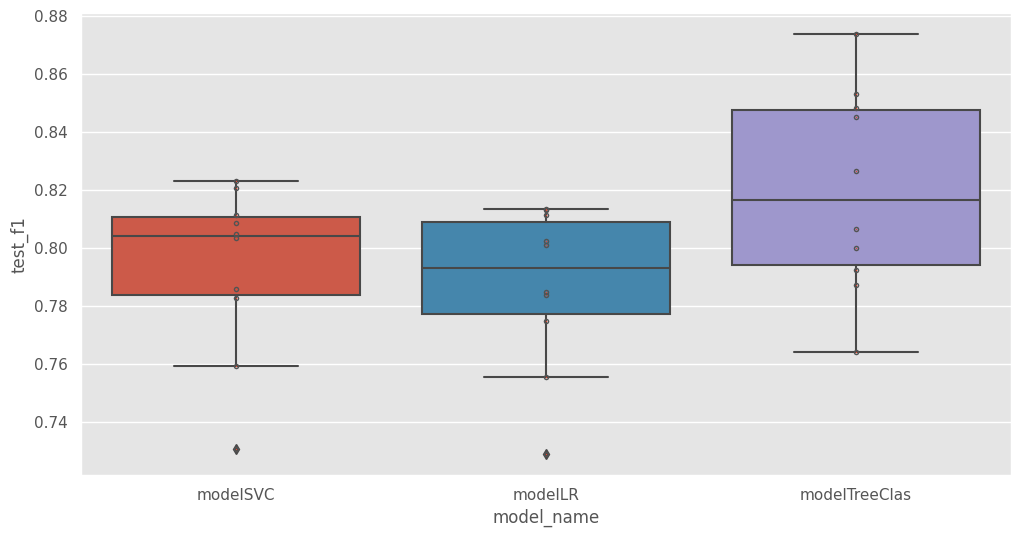

In [1434]:
# Gráfica de f1-score de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_f1', data=cv_df)
sns.stripplot(x='model_name', y='test_f1', data=cv_df,
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

**Gráfica de test_accuracy de los modelos**

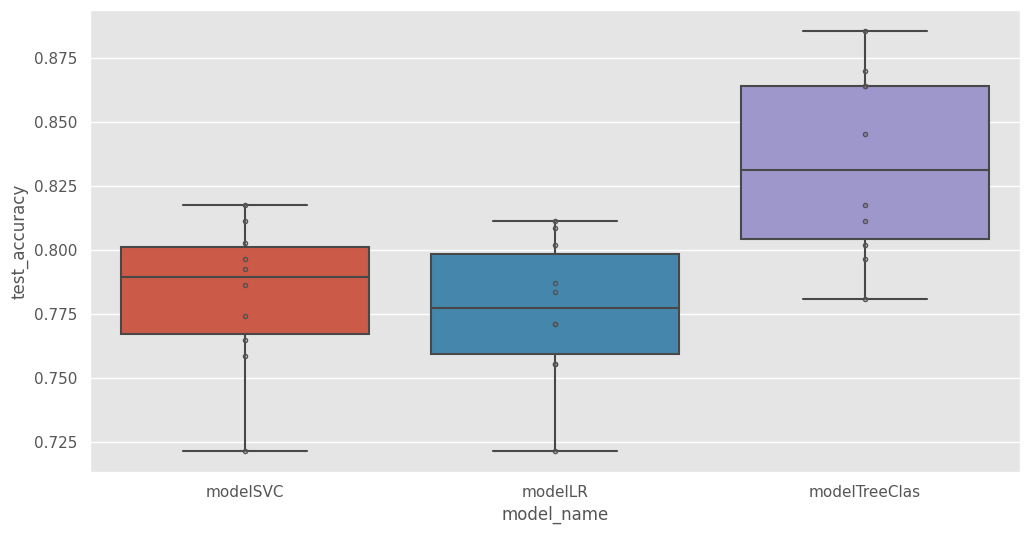

In [1435]:
# Gráfica de test_accuracy de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_accuracy', data=cv_df)
sns.stripplot(x='model_name', y='test_accuracy', data=cv_df,
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

**Gráfica de test_precision de los modelos**

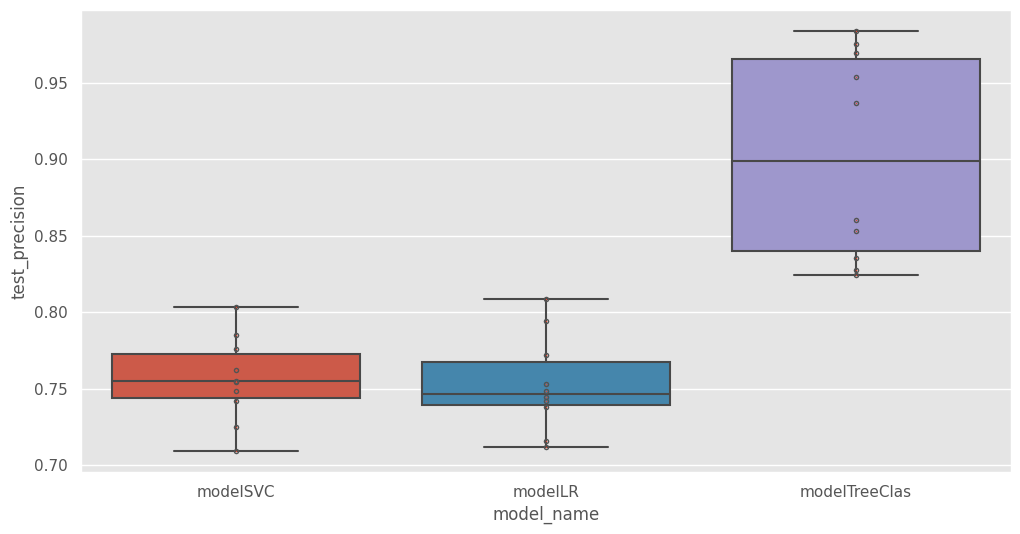

In [1436]:
# Gráfica de test_precision de los modelos

fig = plt.figure(figsize=(12,6))

sns.boxplot(x='model_name', y='test_precision', data=cv_df)
sns.stripplot(x='model_name', y='test_precision', data=cv_df,
              size=1, jitter=False, edgecolor="gray", linewidth=3)
plt.show()

In [1437]:
# impresión de los f1-score de los modelos evaluados
cv_df.groupby('model_name')['test_f1'].mean().sort_values(ascending=False)

model_name
modelTreeClas   0.8197
modelSVC        0.7930
modelLR         0.7868
Name: test_f1, dtype: float64

In [1438]:
# impresión de los test_accuracy de los modelos evaluados
cv_df.groupby('model_name')['test_accuracy'].mean().sort_values(ascending=False)

model_name
modelTreeClas   0.8336
modelSVC        0.7825
modelLR         0.7766
Name: test_accuracy, dtype: float64

In [1439]:
# impresión de los test_precision de los modelos evaluados
cv_df.groupby('model_name')['test_precision'].mean().sort_values(ascending=False)

model_name
modelTreeClas   0.9020
modelSVC        0.7562
modelLR         0.7529
Name: test_precision, dtype: float64

In [1440]:
# Impresión de la desvición estándar de f1-score de los modelos evaluados

cv_df.groupby('model_name')['test_f1'].std().sort_values(ascending=True)

model_name
modelLR         0.0277
modelSVC        0.0292
modelTreeClas   0.0350
Name: test_f1, dtype: float64

In [1441]:
# Impresión de las métricas para un modelo
print(cv_df[cv_df['model_name'] == 'modelTreeClas'])

       model_name  test_accuracy  test_precision  test_recall  test_f1
20  modelTreeClas         0.7809          0.8273       0.7099   0.7641
21  modelTreeClas         0.7963          0.8243       0.7531   0.7871
22  modelTreeClas         0.8019          0.8356       0.7531   0.7922
23  modelTreeClas         0.8111          0.8531       0.7531   0.8000
24  modelTreeClas         0.8173          0.8601       0.7593   0.8066
25  modelTreeClas         0.8700          0.9839       0.7531   0.8531
26  modelTreeClas         0.8638          0.9535       0.7640   0.8483
27  modelTreeClas         0.8452          0.9370       0.7391   0.8264
28  modelTreeClas         0.8638          0.9756       0.7453   0.8451
29  modelTreeClas         0.8854          0.9697       0.7950   0.8737


In [1442]:
# Impresión de la metrica media y mediana de f1-score para un modelo espefífico

print(cv_df[cv_df['model_name'] == 'modelTreeClas']['test_accuracy'].median())
print(cv_df[cv_df['model_name'] == 'modelTreeClas']['test_accuracy'].mean())

0.8312693498452013
0.8335674425715706


In [1443]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Aplicar validación cruzada y obtener predicciones para 'modelTreeClas'
model_name = 'modelTreeClas'
model = models[2][1]  # El tercer modelo en la lista, índice 2
y_pred = cross_val_predict(model, X_Completo, y_Completo, cv=CV)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_Completo, y_pred)

# Imprimir la matriz de confusión
print(f"Matriz de confusión para {model_name}:\n{confusion_mat}")


Matriz de confusión para modelTreeClas:
[[1478  138]
 [ 400 1216]]


####Matriz de confusión del modelo con mejores resultados, arbol de decisión

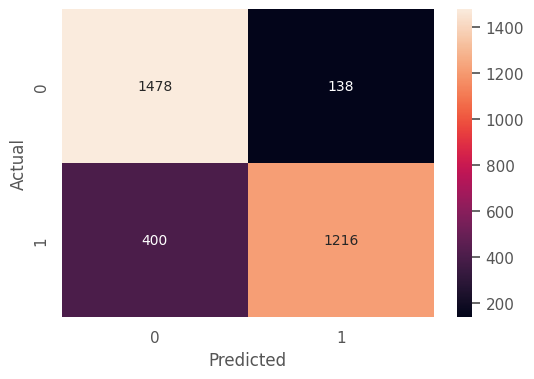

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1616
           1       0.90      0.75      0.82      1616

    accuracy                           0.83      3232
   macro avg       0.84      0.83      0.83      3232
weighted avg       0.84      0.83      0.83      3232



In [1444]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Aplicar validación cruzada y obtener predicciones para 'modelTreeClas'
model_name = 'modelTreeClas'
model = models[2][1]  # El tercer modelo en la lista, índice 2
y_pred = cross_val_predict(model, X_Completo, y_Completo, cv=CV)

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(y_Completo, y_pred)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(6,4))

# Crear mapa de calor de la matriz de confusión con Seaborn
sns.heatmap(confusion_mat
            , annot=True  # agregar valores en cada celda
            , fmt='d'    # formato de los valores (d = decimal)
           )

# Agregar etiquetas a los ejes x e y
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Mostrar la figura
plt.show()

# Se imprimen las medidas de rendimiento del modelo
print(metrics.classification_report(y_Completo, y_pred))


#### Curva ROC

In [1445]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [1446]:
# Ajusta los modelos y calcula las probabilidades de predicción
probas = {}  # Diccionario para almacenar las probabilidades

for model_name, model in models:
    model.fit(X_Completo, y_Completo)
    probas[model_name] = model.predict_proba(X_Completo)[:, 1]


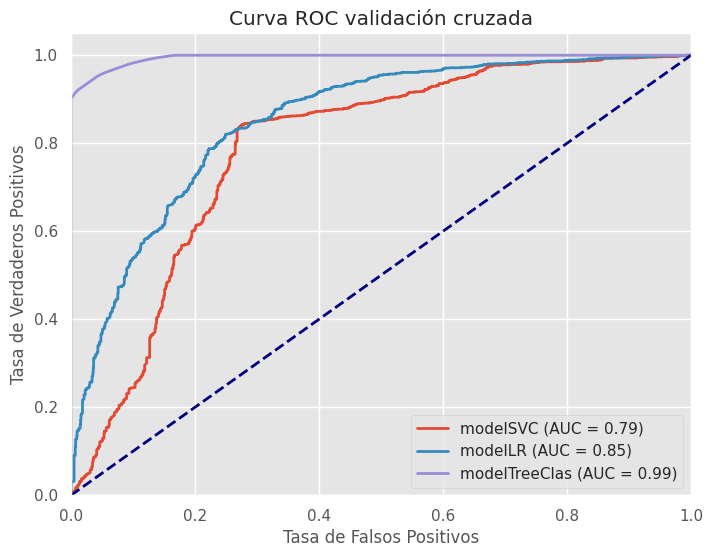

In [1447]:
# Graficar la curva ROC para cada modelo
plt.figure(figsize=(8, 6))

for model_name, _ in models:
    fpr, tpr, _ = roc_curve(y_Completo, probas[model_name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC validación cruzada')
plt.legend(loc='lower right')
plt.show()
